This notebook shows categorical correlations.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
odf = pd.read_csv(r'../data/Collisions.csv', parse_dates=["INCDTTM"], dtype={'SDOT_COLCODE':object, })
odf.columns = map(str.lower, odf.columns)


In [2]:
"""
Clean the data.
Clean the categorical data.
"""
df = odf.copy()
print(df.info())

for c in df.columns:
    print(c)
    print(df[c].value_counts(dropna=False))

df.drop('objectid', inplace=True, axis = 1)

df.drop('inckey', inplace=True, axis = 1)

df.drop('coldetkey', inplace=True, axis = 1)

df.loc[:, 'reportno'] = [x[:2] for x in df['reportno']]

df['status'] = df['status'].astype('category')

df['addrtype'].fillna(value='N/A', inplace=True)
df['addrtype'] = df['addrtype'].astype('category')

df.drop('intkey', inplace=True, axis = 1)

"""
This feature sometimes imports a string ' ' other times NaN, so unify those.
"""
loc = df['exceptrsncode'] == 'NEI'
df.loc[loc, 'exceptrsncode'] = 1
df.loc[~loc, 'exceptrsncode'] = 0
df['exceptrsncode'] = df['exceptrsncode'].astype(np.bool)

df.drop('exceptrsndesc', inplace=True, axis = 1)

df['severitycode'].fillna(value='N/A', inplace=True)
df['severitycode'] = df['severitycode'].astype('category')

df.drop('severitydesc', inplace=True, axis = 1)

df['collisiontype'].fillna(value='N/A', inplace=True)
df['collisiontype'] = df['collisiontype'].astype('category')

df.drop('incdate', inplace=True, axis = 1)

df['junctiontype'].fillna(value='N/A', inplace=True)
df['junctiontype'] = df['junctiontype'].astype('category')

df.drop('sdot_coldesc', inplace=True, axis = 1)

loc = ~df['inattentionind'].isna()
df.loc[loc, 'inattentionind'] = 1
df['inattentionind'].fillna(value=0, inplace=True)
df['inattentionind'] = df['inattentionind'].astype(np.bool)

"""
underinfl switched from 0/1 to Y/N over time
df2 = df.set_index('incdttm')
g = df2['underinfl'].isna().groupby(pd.Grouper(freq='Y'))
g.value_counts()
"""
loc = np.logical_or(df['underinfl'] == 'Y',df['underinfl'] == '1')
df.loc[loc, 'underinfl'] = 1
loc = np.logical_or(df['underinfl'] == 'N', df['underinfl'] == '0')
df.loc[loc, 'underinfl'] = 0
df['underinfl'] = df['underinfl'].astype(np.bool)

df['weather'].fillna(value='N/A', inplace=True)
df['weather'] = df['weather'].astype('category')

df['roadcond'].fillna(value='N/A', inplace=True)
df['roadcond'] = df['roadcond'].astype('category')

df['lightcond'].fillna(value='N/A', inplace=True)
df['lightcond'] = df['lightcond'].astype('category')

loc = ~df['pedrownotgrnt'].isna()
df.loc[loc, 'pedrownotgrnt'] = 1
df['pedrownotgrnt'].fillna(value=0, inplace=True)
df['pedrownotgrnt'] = df['pedrownotgrnt'].astype(np.bool)

"""
sdotcolnum stopped being applied over time
df2 = df.set_index('incdttm')
g = df2['sdotcolnum'].isna().groupby(pd.Grouper(freq='Y'))
g.value_counts()
"""
df.drop('sdotcolnum', inplace=True, axis = 1)

loc = ~df['speeding'].isna()
df.loc[loc, 'speeding'] = 1
df['speeding'].fillna(value=0, inplace=True)
df['speeding'] = df['speeding'].astype(np.bool)

df['st_colcode'].fillna(value='N/A', inplace=True)

df.drop('st_coldesc', inplace=True, axis = 1)

"""
If we knew more about the lane key like northbound/southbound, etc., it would be more useful.
At least record whether the key is present.
"""
loc = df['seglanekey'] == '0'
df.loc[loc, 'seglanekey'] = 0
df.loc[~loc, 'seglanekey'] = 1
df['seglanekey'] = df['seglanekey'].astype(np.bool)

"""
Knowing if a crosswalk was involved is interesting.
"""
loc = df['crosswalkkey'] == '0'
df.loc[loc, 'crosswalkkey'] = 0
df.loc[~loc, 'crosswalkkey'] = 1
df['crosswalkkey'] = df['crosswalkkey'].astype(np.bool)

loc = df['hitparkedcar'] == 'N'
df.loc[loc, 'hitparkedcar'] = 0
df.loc[~loc, 'hitparkedcar'] = 1
df['hitparkedcar'] = df['hitparkedcar'].astype(np.bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220436 entries, 0 to 220435
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   x                212975 non-null  float64       
 1   y                212975 non-null  float64       
 2   objectid         220436 non-null  int64         
 3   inckey           220436 non-null  int64         
 4   coldetkey        220436 non-null  int64         
 5   reportno         220436 non-null  object        
 6   status           220436 non-null  object        
 7   addrtype         216729 non-null  object        
 8   intkey           71516 non-null   float64       
 9   location         215860 non-null  object        
 10  exceptrsncode    100033 non-null  object        
 11  exceptrsndesc    11746 non-null   object        
 12  severitycode     220435 non-null  object        
 13  severitydesc     220436 non-null  object        
 14  collisiontype    194

11     91588
14     58990
00     19103
16     10903
28      9530
24      7673
13      6862
26      5054
18      3412
15      1803
12      1772
51      1468
29       559
21       204
56       199
27       173
54       153
23       129
48       118
31       111
25       109
34       100
64        98
69        86
55        56
33        56
66        31
22        19
44        16
32        13
53         9
61         7
35         6
68         6
58         6
36         4
46         4
47         2
52         2
87         1
NaN        1
Name: sdot_colcode, dtype: int64
sdot_coldesc
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE                  91588
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                            58990
NOT ENOUGH INFORMATION / NOT APPLICABLE                                 19103
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE                 10903
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                            9530
MOTOR VEHCILE STRUCK PEDESTRIAN

C:\Users\lemmonw\Anaconda3\envs\stml\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


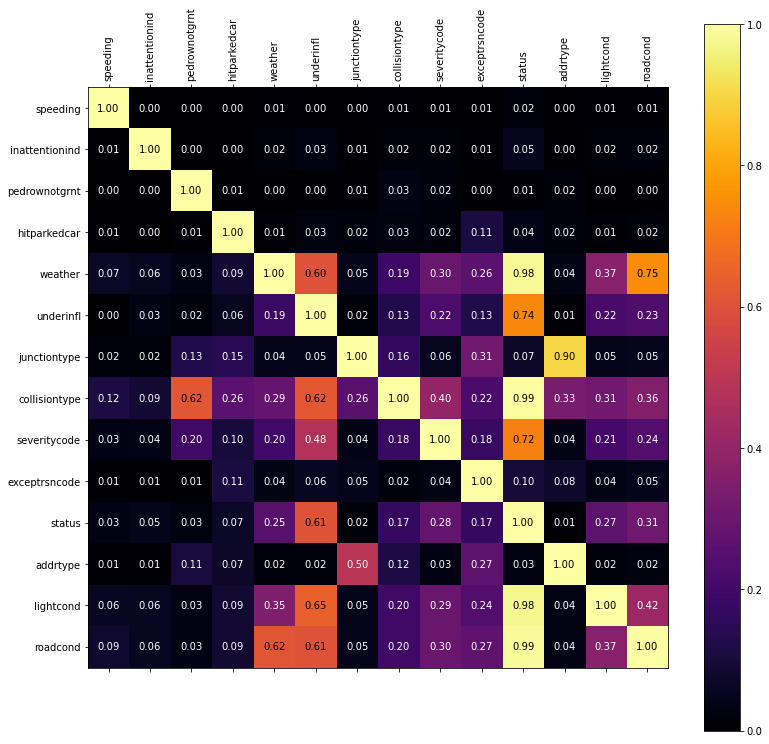

In [9]:
"""
Perform correlation.
"""

def plot(corr, cols):
    fig = plt.figure(figsize=(13,13))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap="inferno", vmin=0, vmax=1)
    
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.2f}'.format(z), color='k' if z > 0.5 else 'w', ha='center', va='center')
    
    fig.colorbar(cax)
    ticks = np.arange(0, len(cols), 1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(cols, rotation=90, horizontalalignment="center")
    ax.set_yticklabels(cols)
    plt.show();

    

"""
cramer's v is symmetric nominal association.
"""
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    #print(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    #print(chi2)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


"""
source:
https://github.com/shakedzy/dython/blob/master/dython/nominal.py
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
"""
import math
import numpy as np
from collections import Counter
def conditional_entropy(x, y):
    _, yv, yc = np.unique(y, return_counts=True, return_inverse=True)
    xy = np.dstack([x, y])
    
    xy, xyv, xyc = np.unique(xy, return_counts=True, return_inverse=True, axis=1)
    
    entropy = -(np.log(xyc[xyv])-np.log(yc[yv])).sum()/len(x)#np.log(yc[yv]/xyc[xyv]).sum()/len(x)
    return entropy


"""
theil's u is asymmetric nominal association.
"""
def theils_u(x, y):
    s_xy = conditional_entropy(x, y)
    _, xv, xc = np.unique(x, return_counts=True, return_inverse=True)
    #print(xc, xv)
    #p_x = xc/len(x)
    
    #s_x = ss.entropy(p_x)
    ent = -(np.log(xc[xv])-np.log(len(x))).sum()/len(x)
    #assert np.isclose(mv, s_x) == True
    #assert s_x != 0
    
    res = (ent - s_xy) / ent if ent else 1
    #print(res)
    return res
    #return (s_x - s_xy) / s_x if s_x else 1
    
    
"""
create df copy where we replace category labels with actual numeric codes.
"""
df2 = df.copy()
cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)

"""
short list of categories we might be interested in.
"""
cols = ['speeding', 'inattentionind', 'pedrownotgrnt', 'hitparkedcar', 
        'weather', 'underinfl', 'junctiontype', 'collisiontype', 'severitycode', 'exceptrsncode',
        'status', 'addrtype', 'lightcond', 'roadcond']

"""
run it. plot it.
"""
corr = df2[cols].corr(method=cramers_v)
plot(corr, cols)

x, y = np.meshgrid(cols, cols)
corr = np.array([theils_u(df2[x], df2[y]) for (x, y) in zip(x.flatten(), y.flatten())]).reshape(len(cols), len(cols))
plot(corr, cols)





In [7]:
pd.crosstab(df2['inattentionind'], df2['underinfl'])


underinfl,False,True
inattentionind,,
False,155541,34708
True,29135,1052


In [6]:
theils_u(df2['underinfl'], df2['inattentionind'])

0.028472543662034333